In [17]:
#unzip the data file and rename the unzipped file to data.csv
import zipfile

with zipfile.ZipFile('data/Melbourne_housing_FULL.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')
import os
os.rename('data/Melbourne_housing_FULL.csv', 'data/data.csv')

In [1]:
# Import libraries here
import warnings

from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import kaggle
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# set data location
data = "../data/"

In [20]:
# read the data
houses = pd.read_csv(data + 'data.csv')

In [21]:
#get the shape of the data
houses.shape

(34857, 21)

In [22]:
# get the info of the data
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [23]:
#get the columns with more than 50% missing values
houses.columns[houses.isnull().mean() > 0.5]

Index(['BuildingArea', 'YearBuilt'], dtype='object')

In [24]:
# check cardinality of the categorical features
houses.select_dtypes(exclude='number').nunique()

Suburb           351
Address        34009
Type               3
Method             9
SellerG          388
Date              78
CouncilArea       33
Regionname         8
dtype: int64

#### EDA: Univariate Analysis

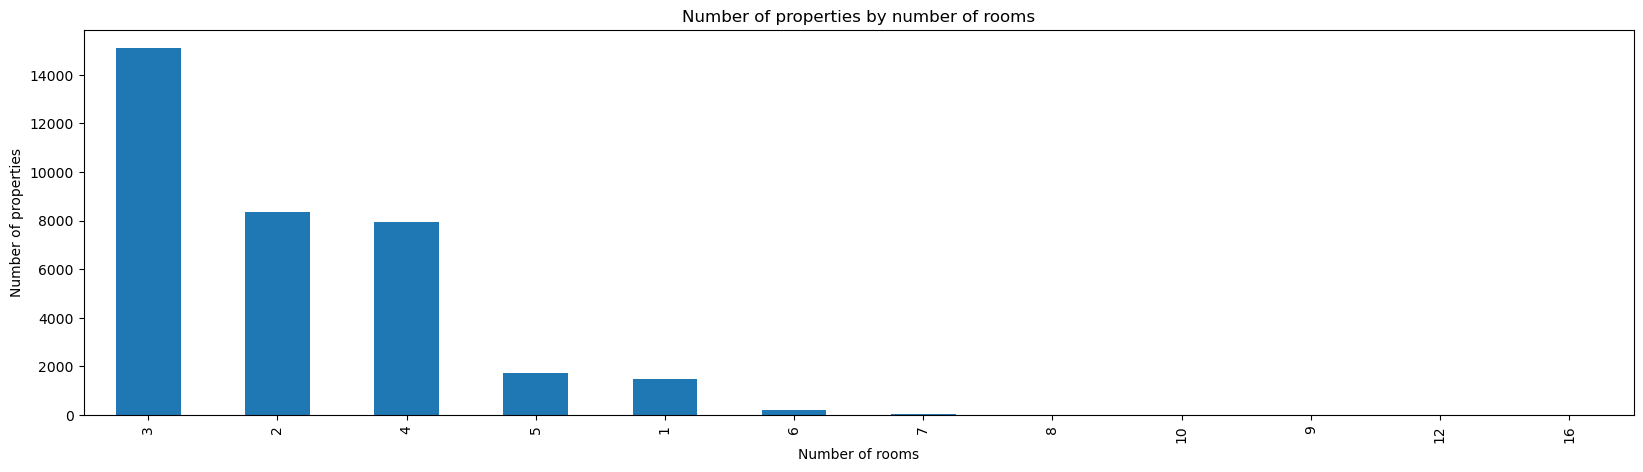

In [ ]:
# visualize the spread of the rooms
houses['Rooms'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by number of rooms')
plt.ylabel('Number of properties')
plt.xlabel('Number of rooms')
plt.show()

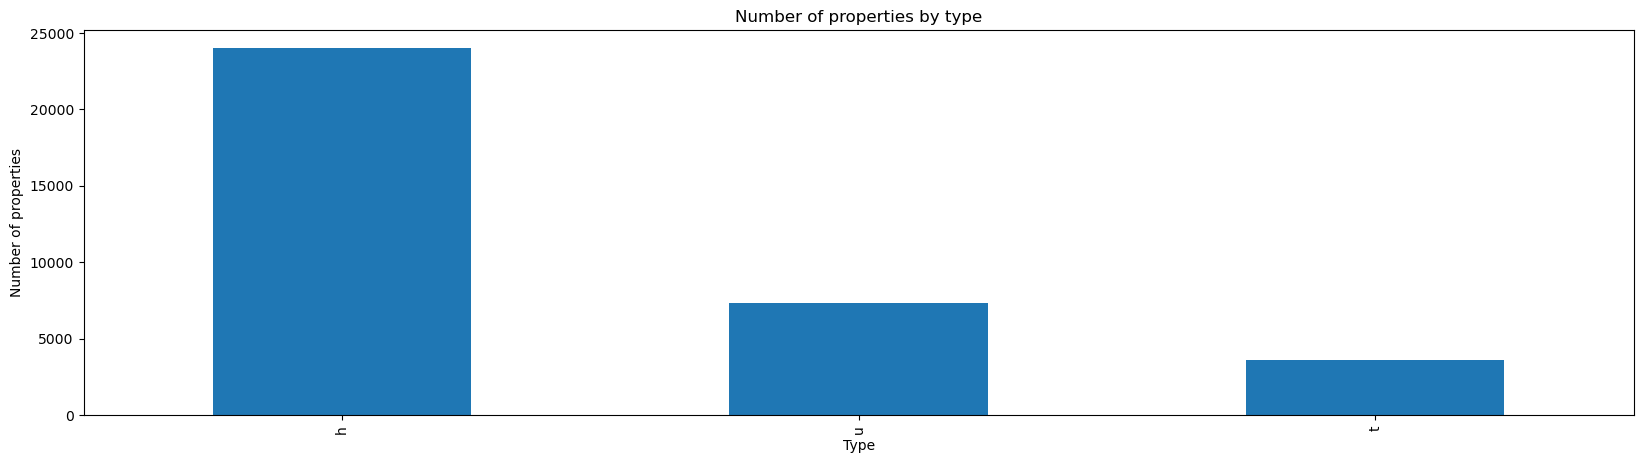

In [ ]:
# visualize the spread of the type of property
houses['Type'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by type')
plt.ylabel('Number of properties')
plt.xlabel('Type')
plt.show()

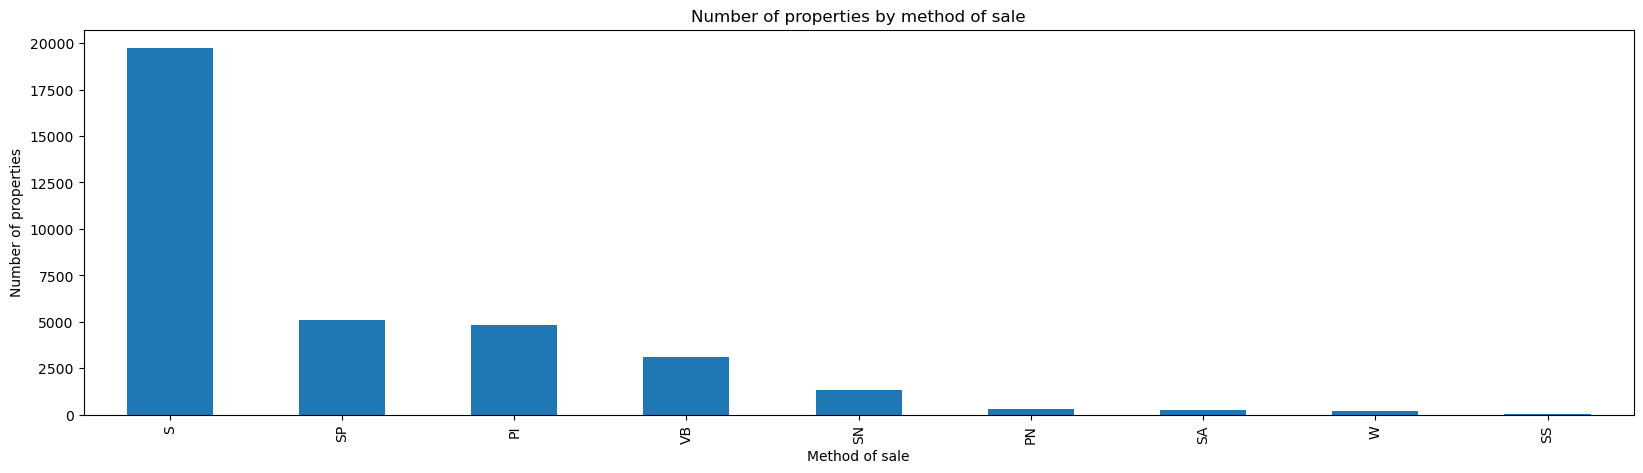

In [ ]:
# visualize the spread of the method of sale
houses['Method'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by method of sale')
plt.ylabel('Number of properties')
plt.xlabel('Method of sale')
plt.show()

In [ ]:
# get the value count of the Seller
houses['SellerG'].value_counts()

Jellis             3359
Nelson             3236
Barry              3235
hockingstuart      2623
Marshall           2027
                   ... 
Clairmont             1
Buxton/Find           1
Harcourts/Barry       1
Silver                1
Methven               1
Name: SellerG, Length: 388, dtype: int64

In [ ]:
#describe the distance to the CBD
houses['Distance'].describe()

count    34856.000000
mean        11.184929
std          6.788892
min          0.000000
25%          6.400000
50%         10.300000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

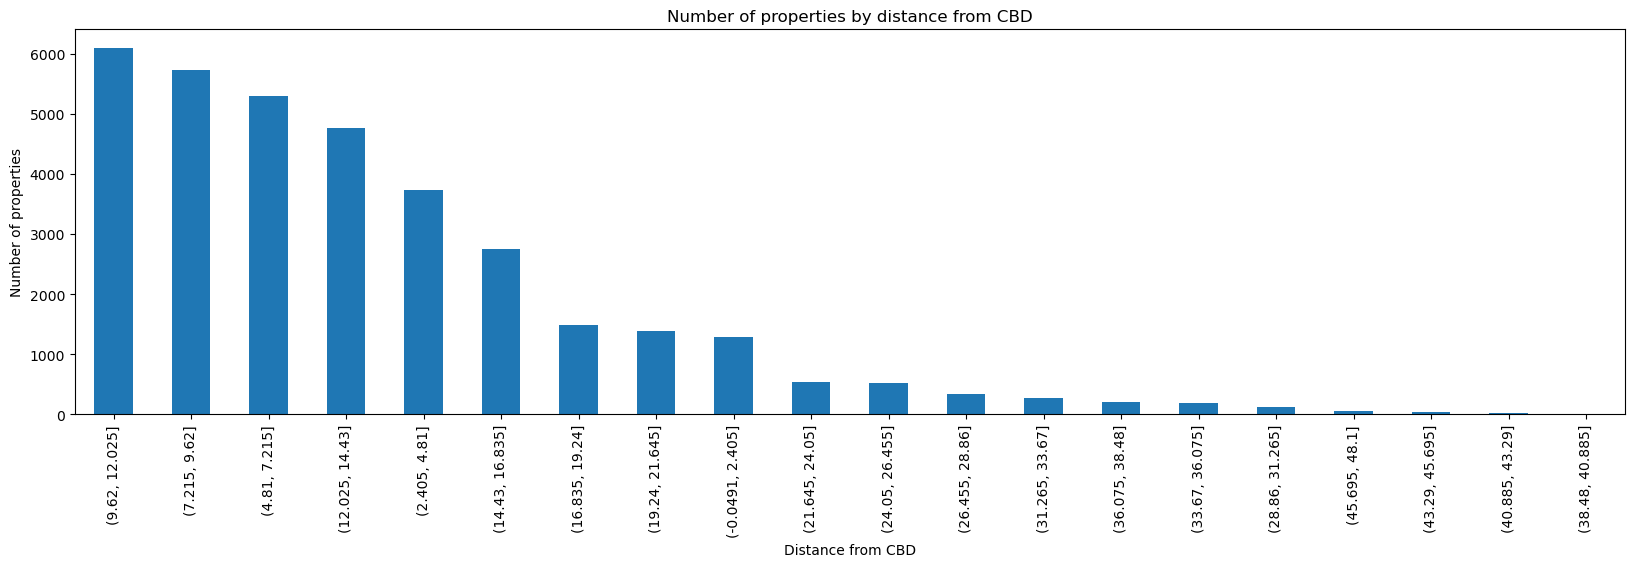

In [ ]:
# visualize the binned spread of the distance from the CBD
houses['Distance'].value_counts(bins=20).plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by distance from CBD')
plt.ylabel('Number of properties')
plt.xlabel('Distance from CBD')
plt.show()

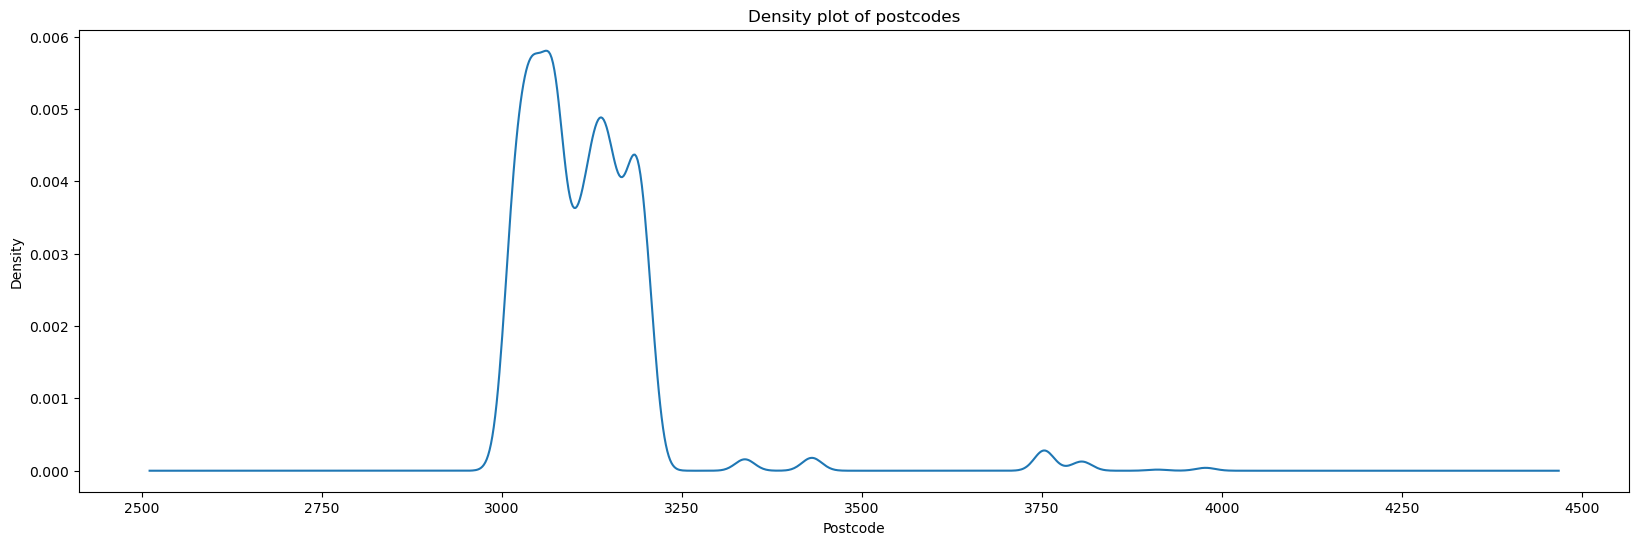

In [ ]:
#visualize the density plot of of the postcodes
houses['Postcode'].plot.density(figsize=(20, 6))
plt.title('Density plot of postcodes')
plt.ylabel('Density')
plt.xlabel('Postcode')
plt.show()

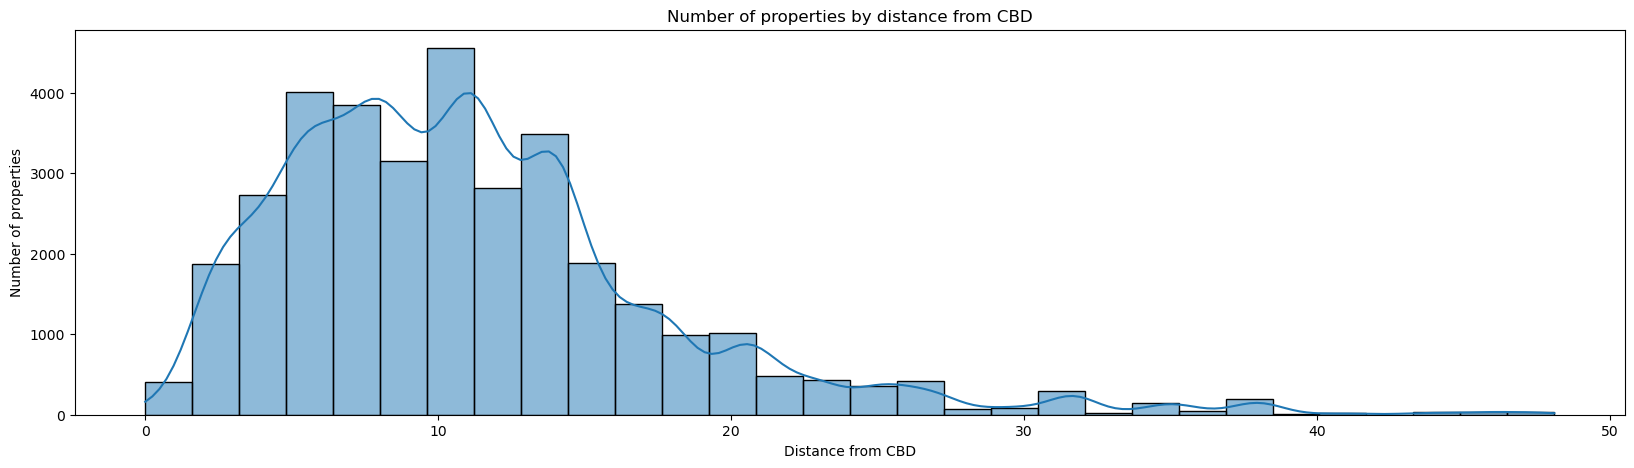

In [ ]:
# visualize a histplot of the distance from the CBD
plt.figure( figsize=(20, 5))
sns.histplot(houses['Distance'], bins=30, kde=True)
plt.title('Number of properties by distance from CBD')
plt.ylabel('Number of properties')
plt.xlabel('Distance from CBD')
plt.show()

In [ ]:
#describe the number of bedrooms
houses['Bedroom2'].describe()

count    26640.000000
mean         3.084647
std          0.980690
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         30.000000
Name: Bedroom2, dtype: float64

In [ ]:
#how many properties have more than 10 rooms
houses[houses['Bedroom2'] > 10]['Bedroom2'].count()

4

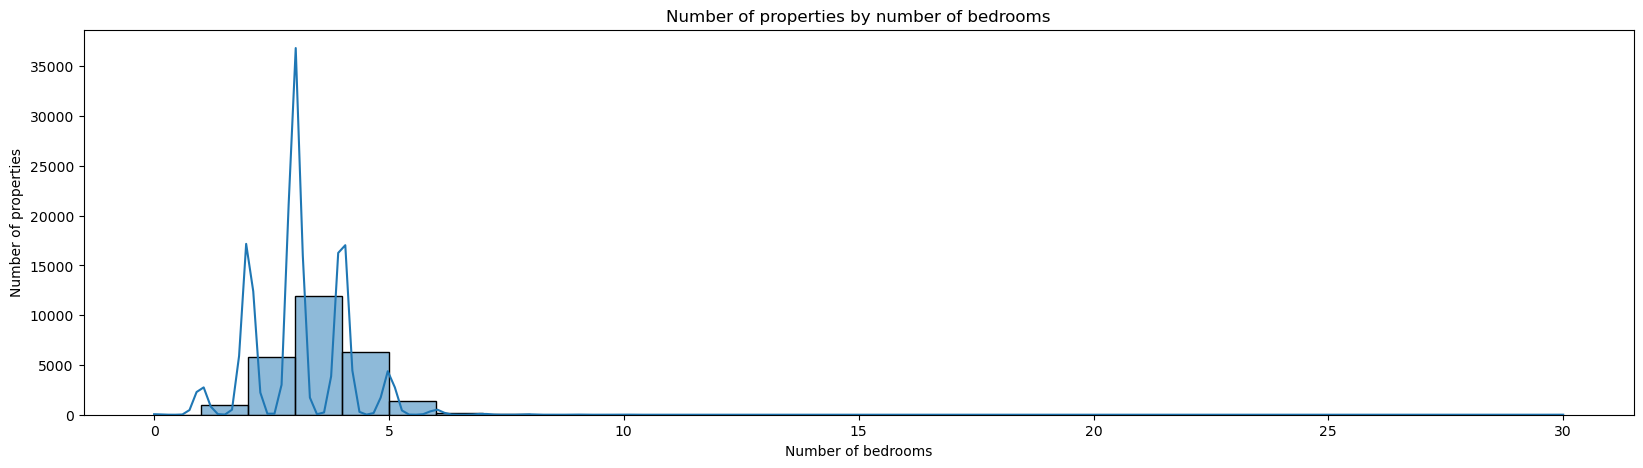

In [ ]:
# visualize the histplot of the number of bedrooms
plt.figure( figsize=(20, 5))
sns.histplot(houses['Bedroom2'], bins=30, kde=True)
plt.title('Number of properties by number of bedrooms')
plt.ylabel('Number of properties')
plt.xlabel('Number of bedrooms')
plt.show()

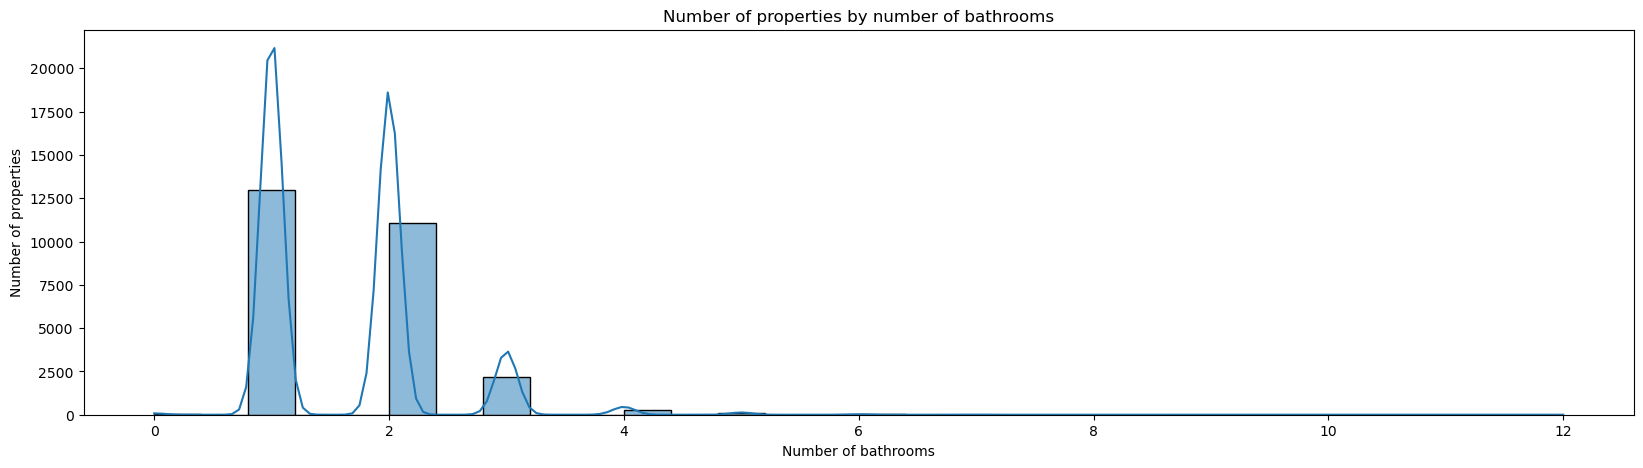

In [ ]:
# visualize the histplot of the number of bathrooms
plt.figure( figsize=(20, 5))
sns.histplot(houses['Bathroom'], bins=30, kde=True)
plt.title('Number of properties by number of bathrooms')
plt.ylabel('Number of properties')
plt.xlabel('Number of bathrooms')
plt.show()

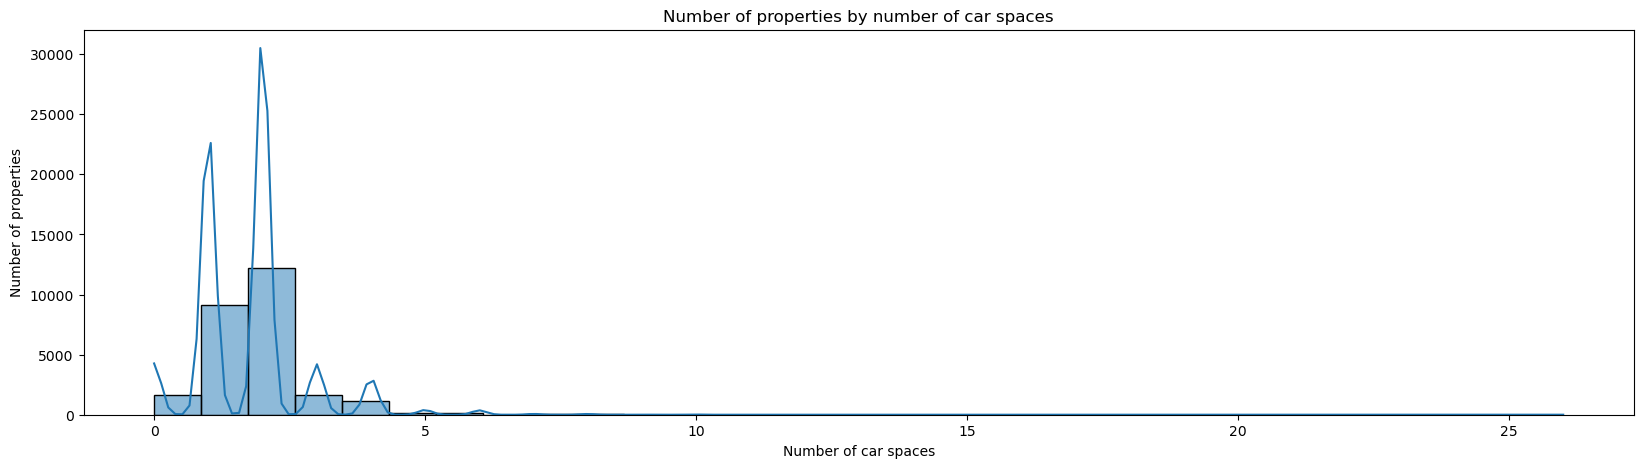

In [ ]:
# visualize the histplot of the number of car spaces
plt.figure( figsize=(20, 5))
sns.histplot(houses['Car'], bins=30, kde=True)
plt.title('Number of properties by number of car spaces')
plt.ylabel('Number of properties')
plt.xlabel('Number of car spaces')
plt.show()

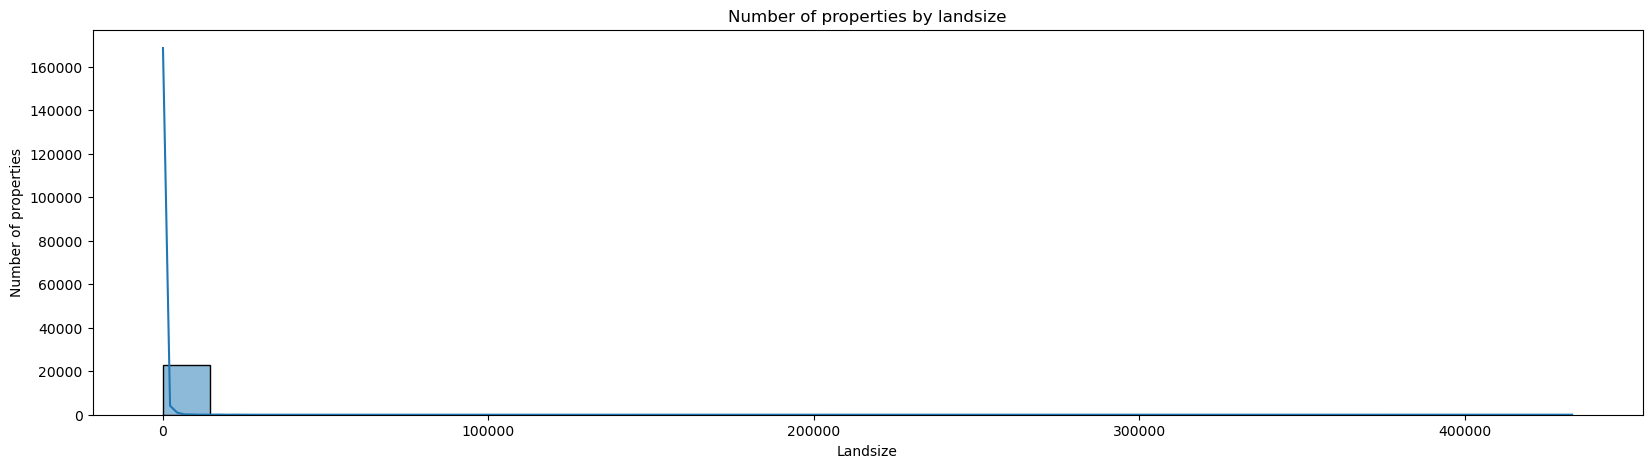

In [ ]:
# visualize the distribution of the number of landsize
plt.figure( figsize=(20, 5))
sns.histplot(houses['Landsize'], bins=30, kde=True)
plt.title('Number of properties by landsize')
plt.ylabel('Number of properties')
plt.xlabel('Landsize')
plt.show()

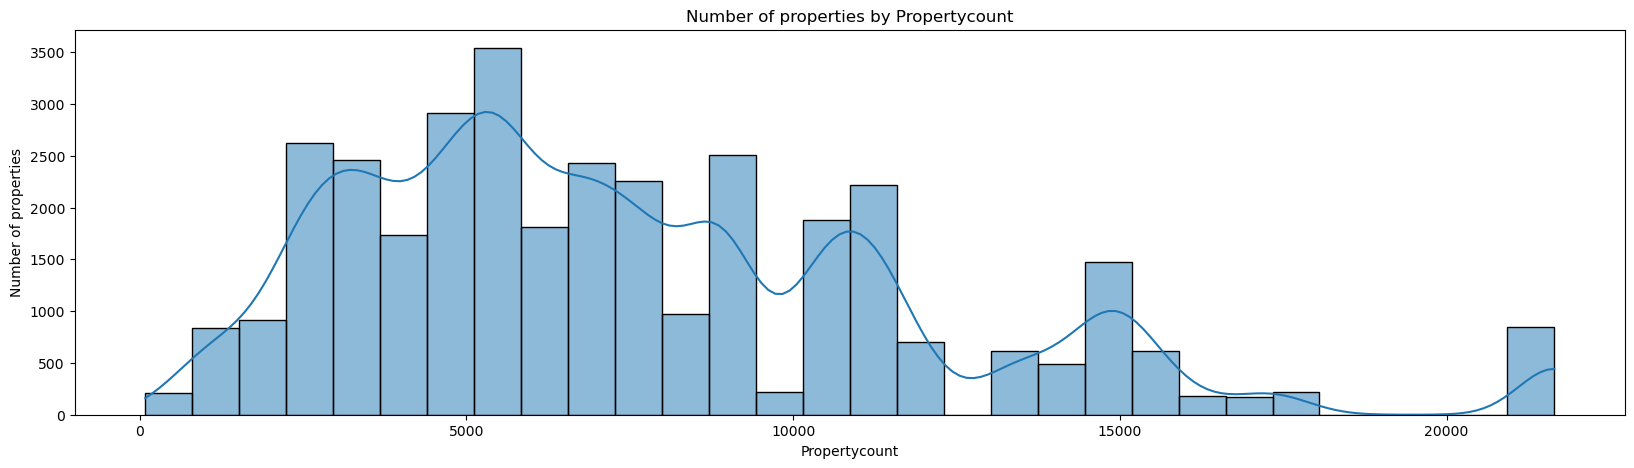

In [ ]:
#visualize the distribution of the Propertycount
plt.figure( figsize=(20, 5))
sns.histplot(houses['Propertycount'], bins=30, kde=True)
plt.title('Number of properties by Propertycount')
plt.ylabel('Number of properties')
plt.xlabel('Propertycount')
plt.show()

In [ ]:
#get value count of the Propertycount
houses['Propertycount'].value_counts()

21650.0    844
8870.0     722
10969.0    583
14949.0    552
10412.0    491
          ... 
129.0        1
1588.0       1
5462.0       1
1160.0       1
342.0        1
Name: Propertycount, Length: 342, dtype: int64

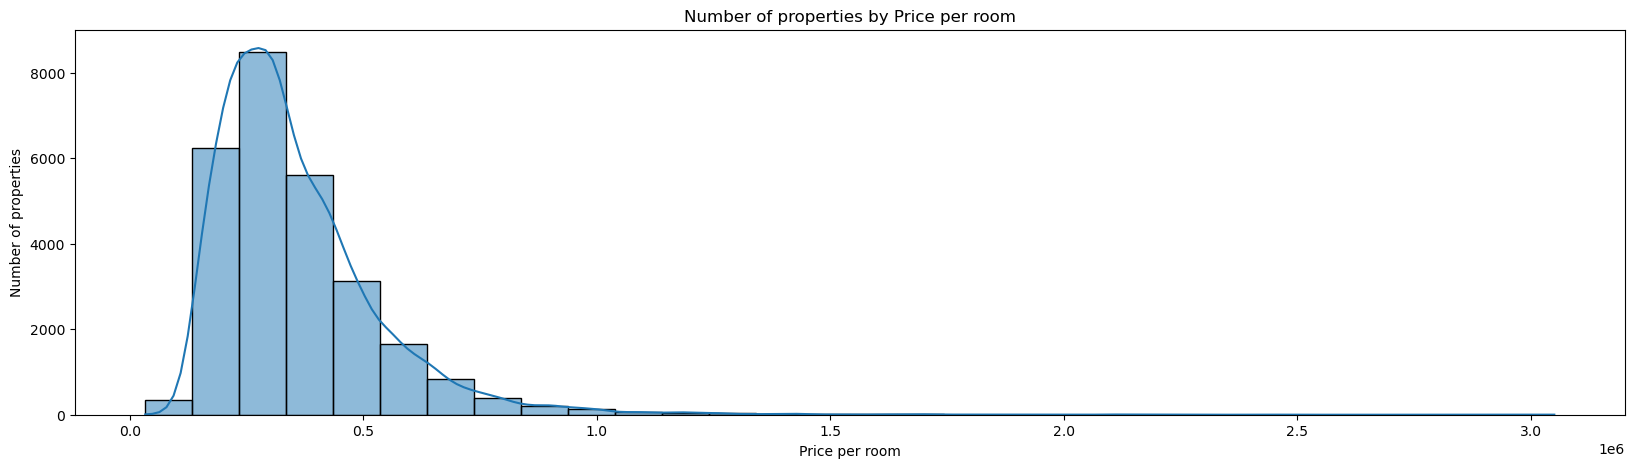

In [ ]:
# visualize the distrubtion of PpR: Price per room
plt.figure( figsize=(20, 5))
sns.histplot(houses['PpR'], bins=30, kde=True)
plt.title('Number of properties by Price per room')
plt.ylabel('Number of properties')
plt.xlabel('Price per room')
plt.show()

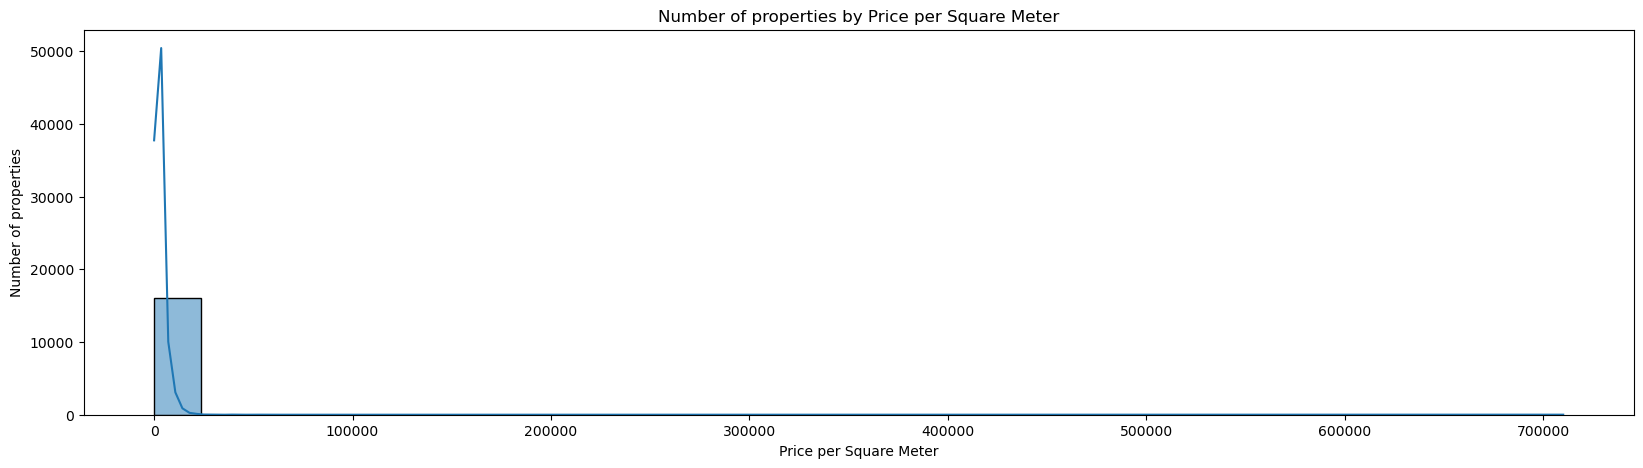

In [ ]:
# visualize the distrubtion of PpSM: Price per Square Meter
plt.figure( figsize=(20, 5))
sns.histplot(houses['PpSM'], bins=30, kde=True)
plt.title('Number of properties by Price per Square Meter')
plt.ylabel('Number of properties')
plt.xlabel('Price per Square Meter')
plt.show()

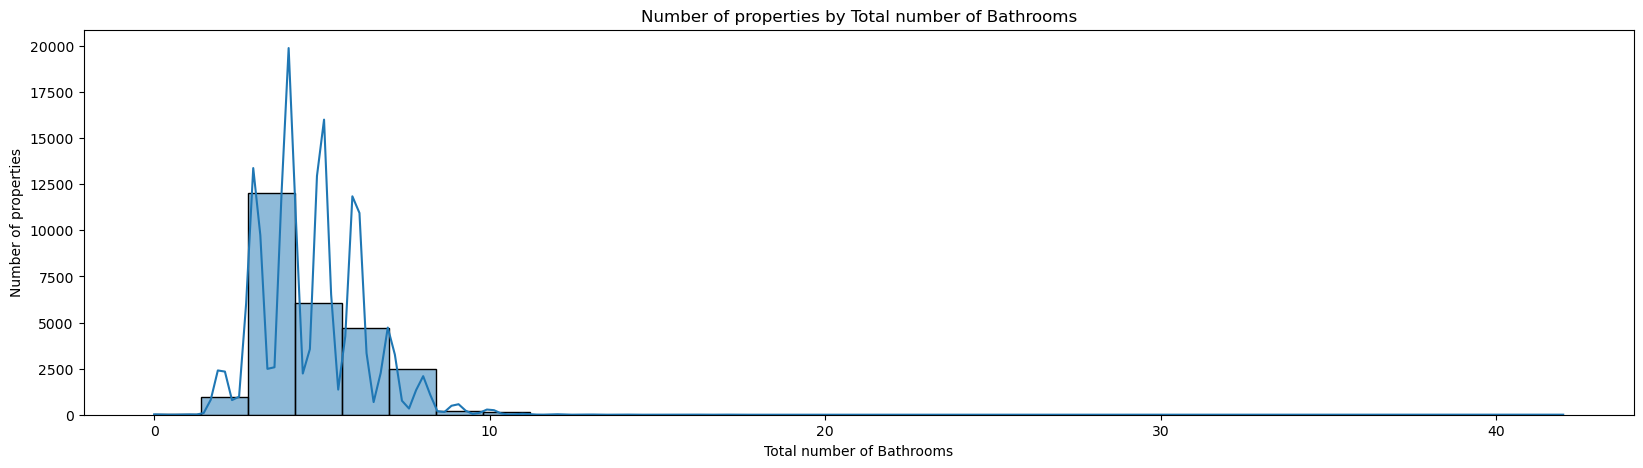

In [ ]:
# visualize the histplot of the Total number of Bathrooms
plt.figure( figsize=(20, 5))
sns.histplot(houses['TotalBathrooms'], bins=30, kde=True)
plt.title('Number of properties by Total number of Bathrooms')
plt.ylabel('Number of properties')
plt.xlabel('Total number of Bathrooms')
plt.show()

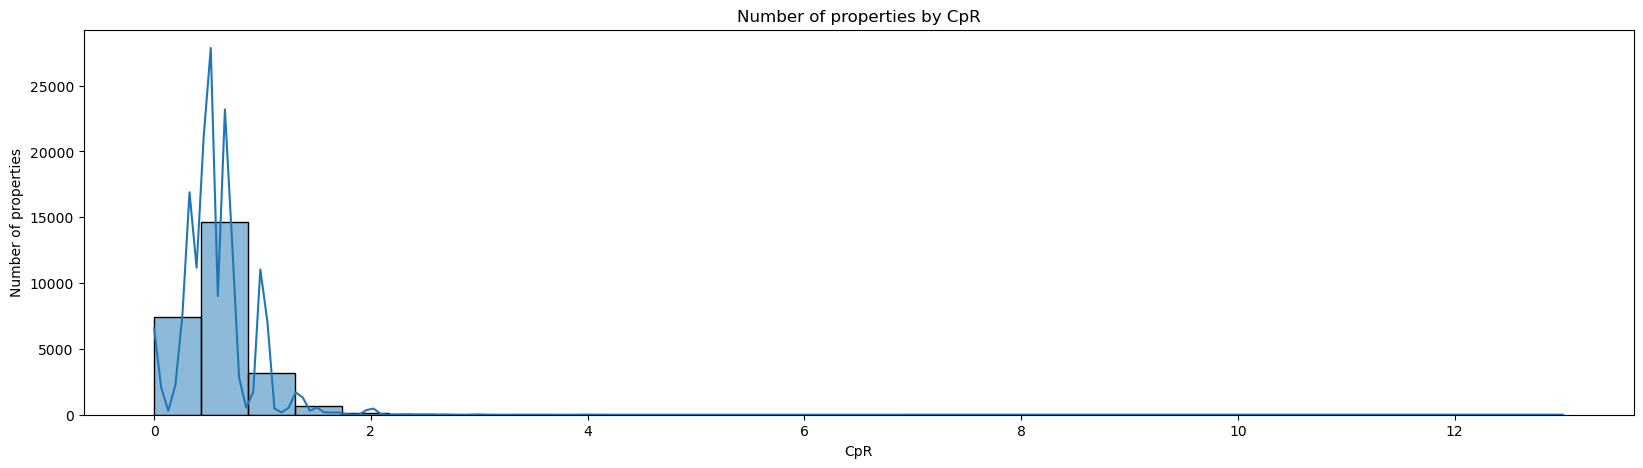

In [ ]:
# visualize the histplot of the CpR
plt.figure( figsize=(20, 5))
sns.histplot(houses['CpR'], bins=30, kde=True)
plt.title('Number of properties by CpR')
plt.ylabel('Number of properties')
plt.xlabel('CpR')
plt.show()

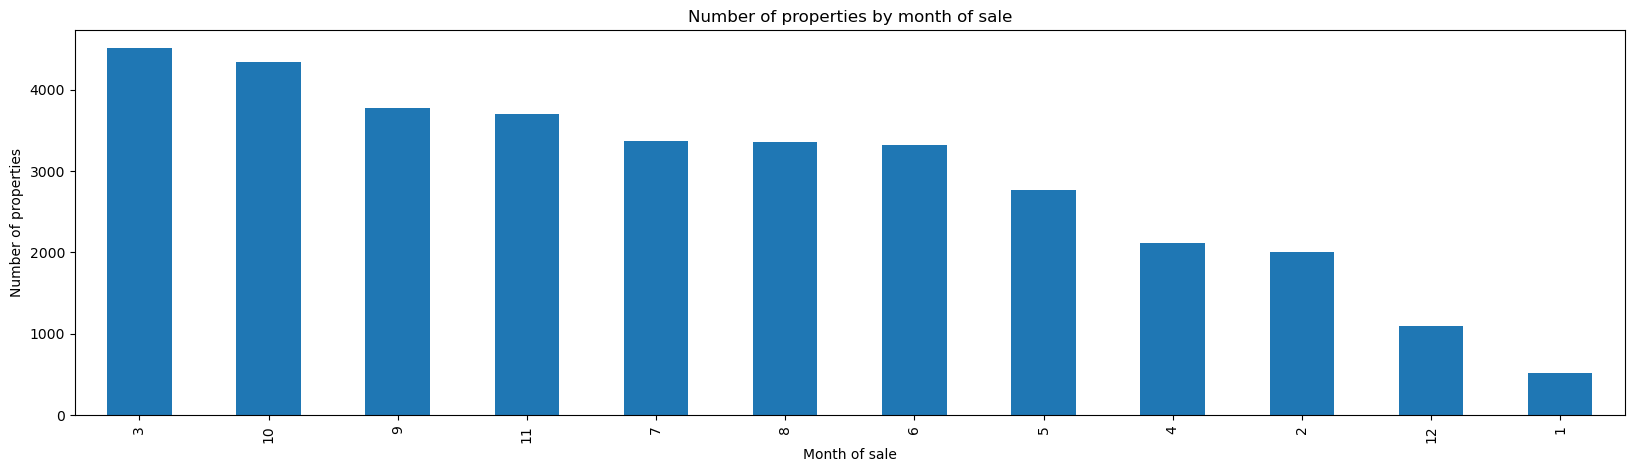

In [ ]:
# visualize the spread of month of sale
houses['Month'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by month of sale')
plt.ylabel('Number of properties')
plt.xlabel('Month of sale')
plt.show()

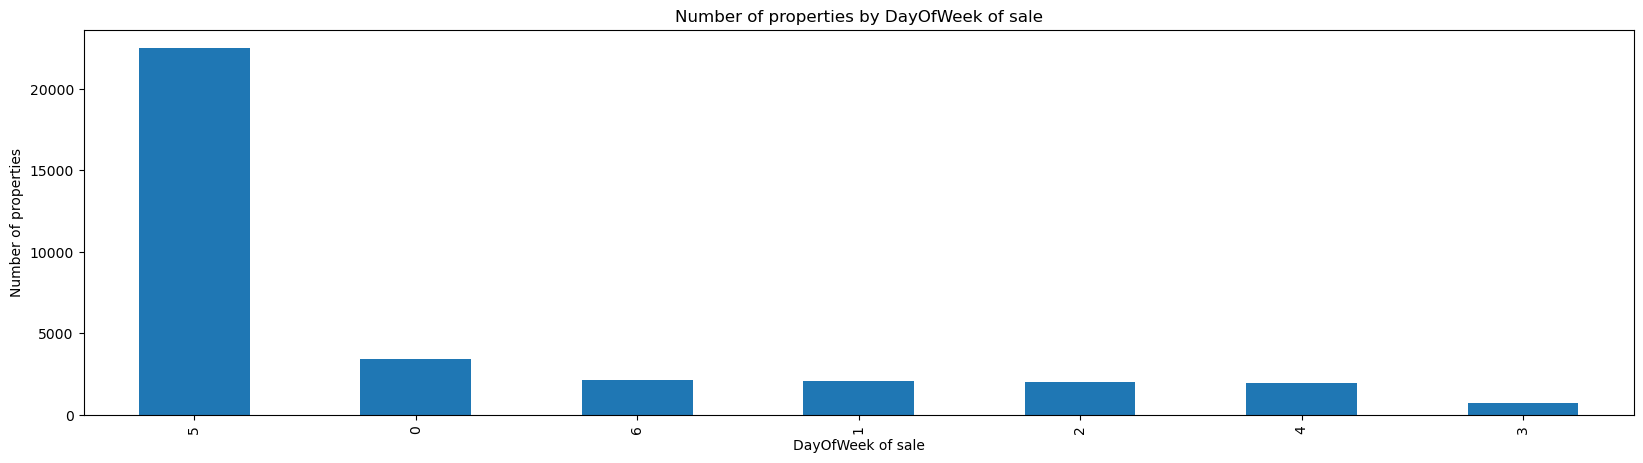

In [ ]:
# visualize the spread of DayOfWeek of sale
houses['DayOfWeek'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by DayOfWeek of sale')
plt.ylabel('Number of properties')
plt.xlabel('DayOfWeek of sale')
plt.show()

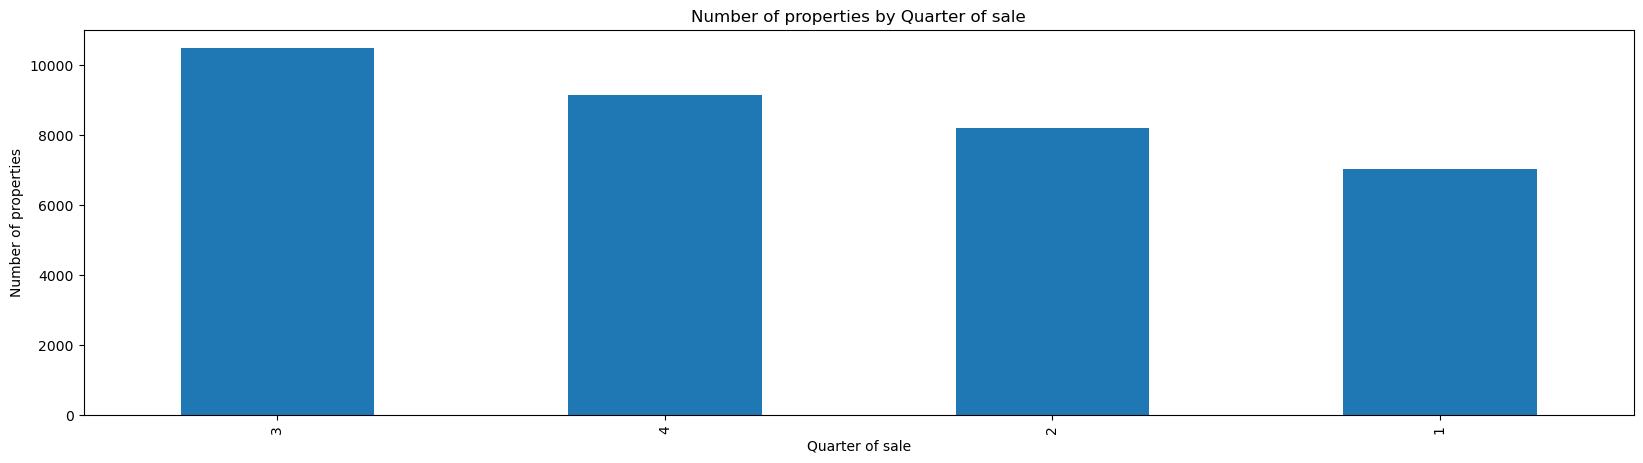

In [ ]:
# visualize the spread of Quarter of sale
houses['Quarter'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by Quarter of sale')
plt.ylabel('Number of properties')
plt.xlabel('Quarter of sale')
plt.show()

#### EDA: Bivariate Analysis

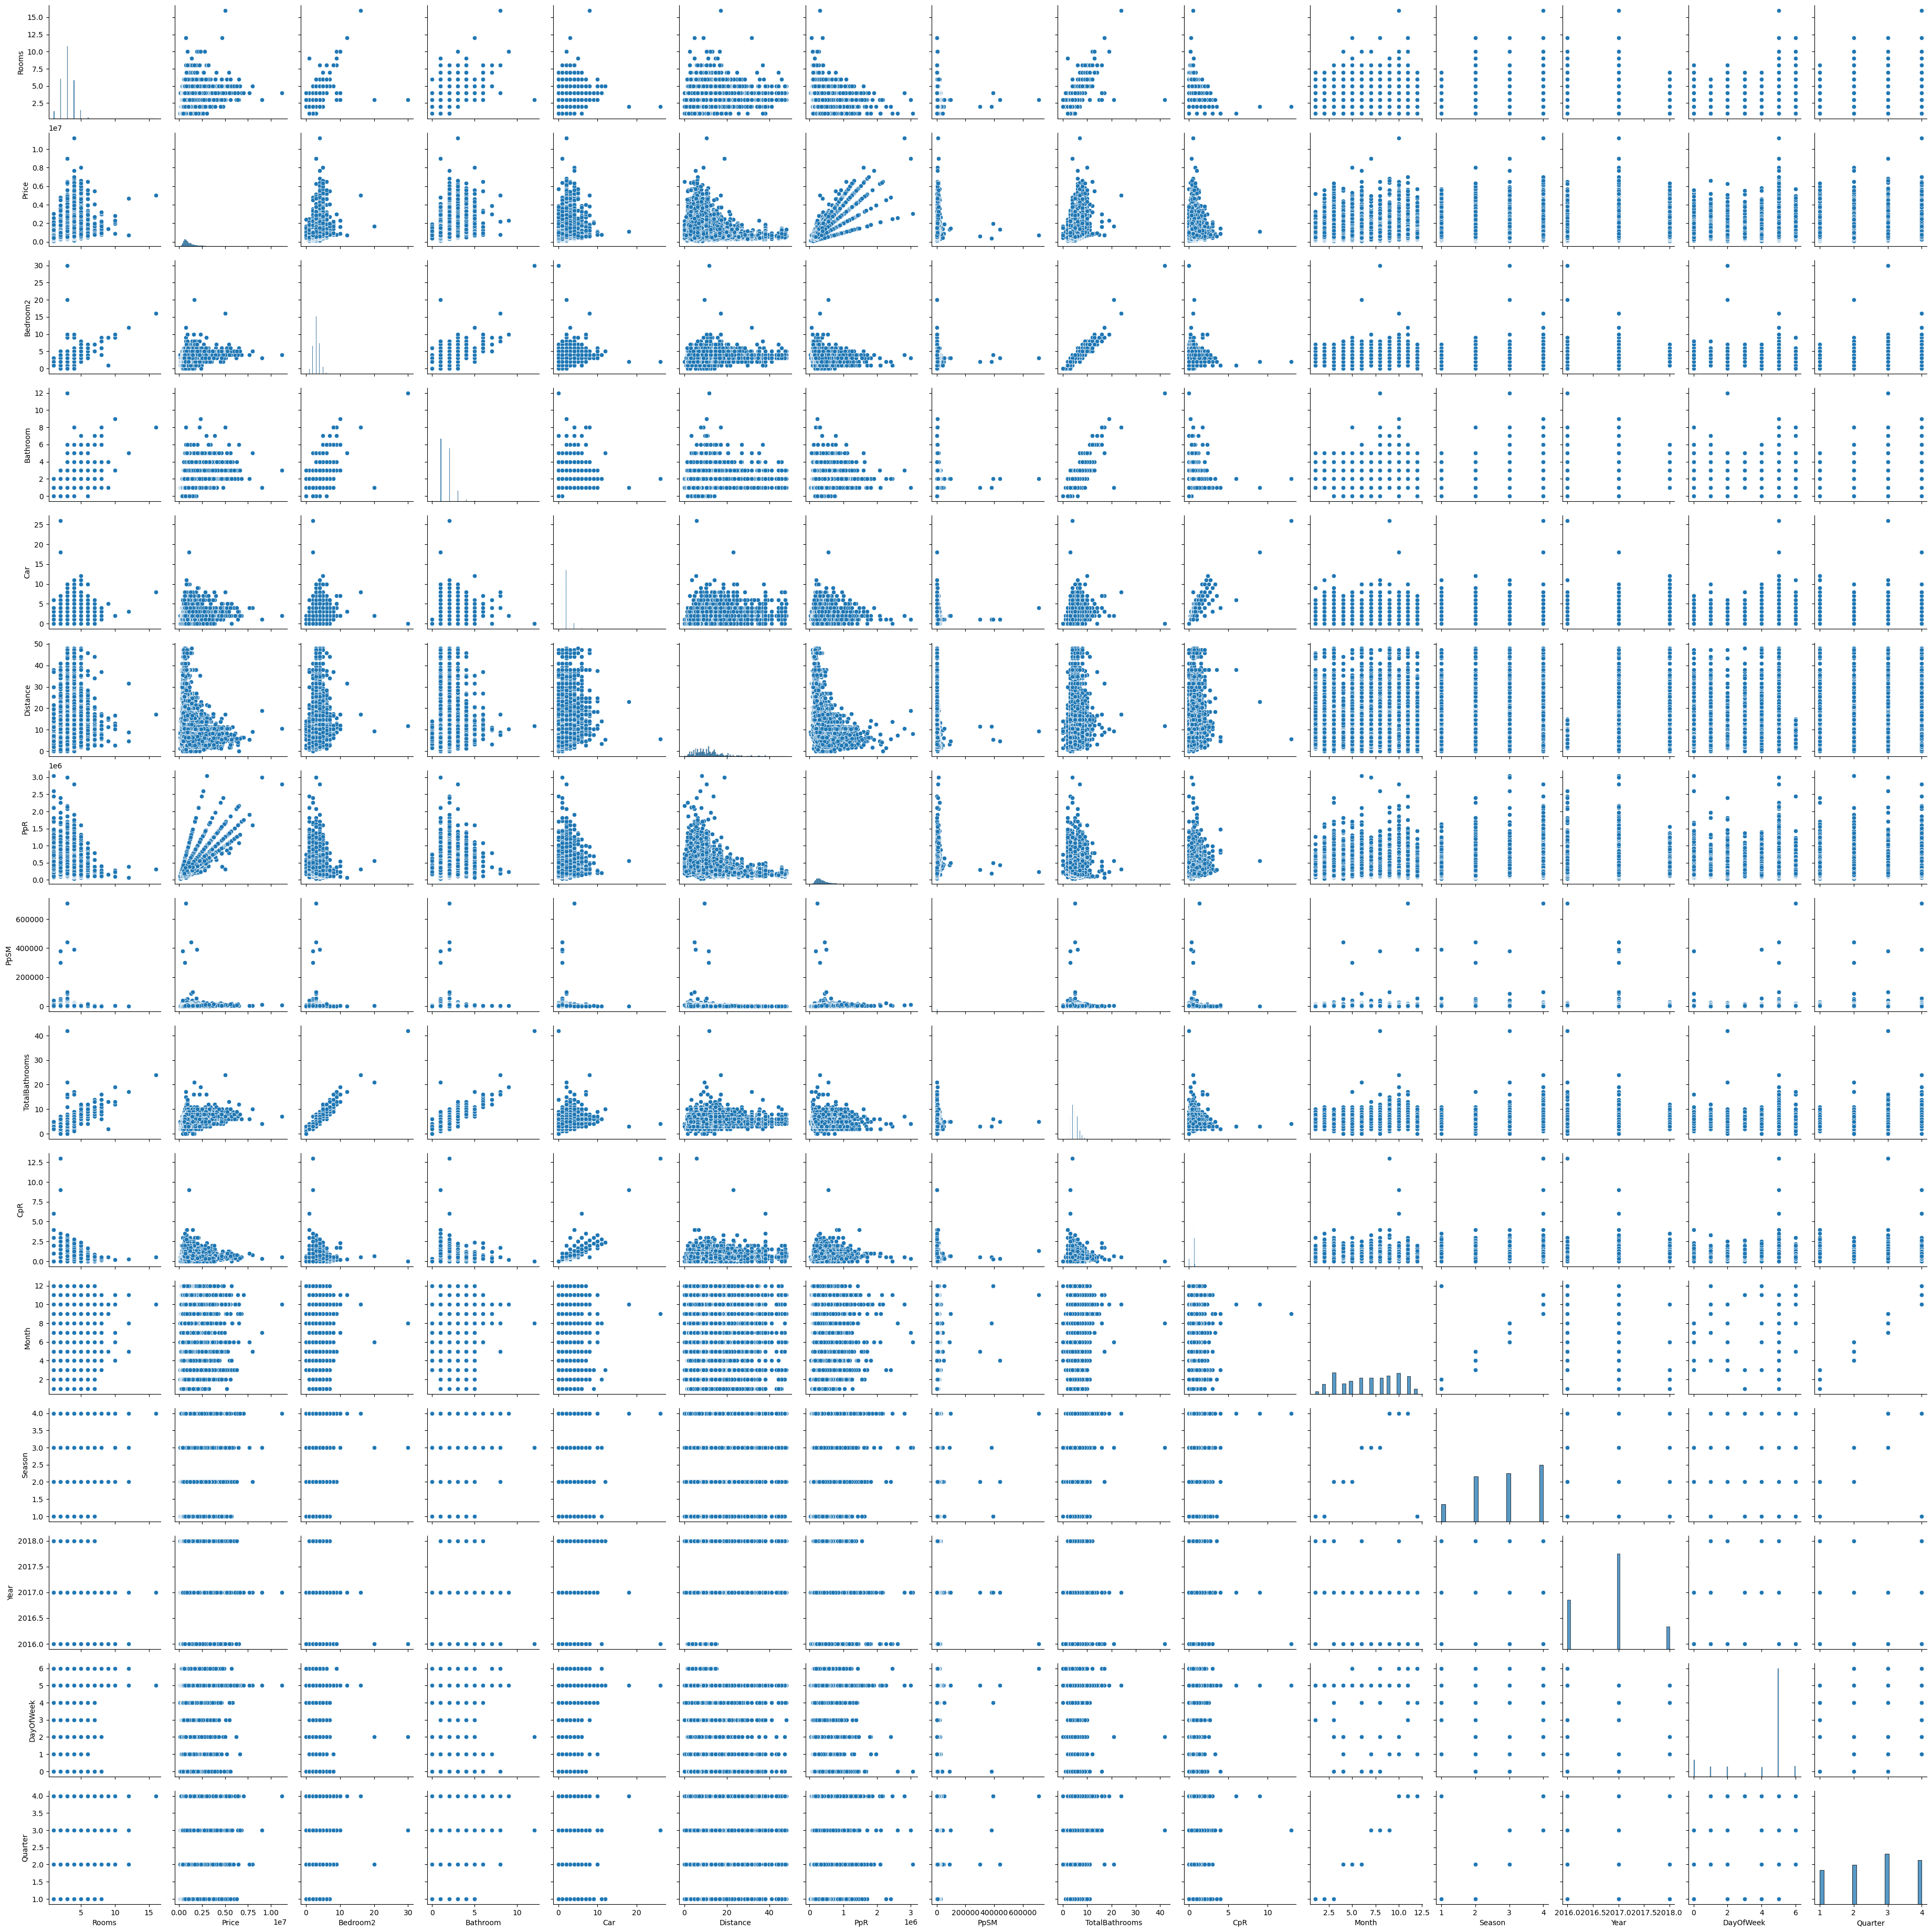

In [9]:
# visualize the pair plot of 'Landsize', 'Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Distance'
sns.pairplot(houses[['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 
       'Distance', 'PpR', 'PpSM', 'TotalBathrooms', 'CpR', 'Month',
       'Season', 'Year', 'DayOfWeek', 'Quarter']])
plt.show()

In [93]:
# list the columns
houses.columns

Index(['Suburb', 'Address', 'Rooms', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Propertycount', 'PpR', 'PpSM', 'TotalBathrooms', 'CpR', 'Month',
       'Season', 'Year', 'Type_h', 'Type_t', 'Type_u',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'DayOfWeek', 'Quarter'],
      dtype='object')

### Feature Engineering

In [25]:
### Feature Engineering
# Price per Room: Calculate the price per room by dividing the 'Price' by the total number of 'Rooms'. This can provide insights into the cost per living space.
# PpR: Price per Room
houses['PpR'] = houses['Price'] / houses['Rooms']
# Price per Square Meter: Calculate the price per square meter by dividing the 'Price' by 'Landsize' or 'BuildingArea'. This normalized metric can help compare property values irrespective of size.
# PpSM: Price per Square Meter
houses['PpSM'] = houses['Price'] / houses['Landsize']
# Total Bathrooms: Sum the 'Bathroom' and 'Bedroom2' features to create a new feature representing the total number of bathrooms in the property.
# Total Bathrooms
houses['TotalBathrooms'] = houses['Bathroom'] + houses['Bedroom2']
# Car Spaces per Room:Divide the 'Car' feature by the total number of 'Rooms' to get an average number of car spaces per room.
# Car Spaces per Room
houses['CpR'] = houses['Car'] / houses['Rooms']
# Seasonal Variables: Extract month and season information from the 'Date' feature to account for potential seasonal variations in property prices.
# Month
houses['Month'] = pd.DatetimeIndex(houses['Date']).month
# Season
houses['Season'] = houses['Month'] % 12 // 3 + 1
# Year
houses['Year'] = pd.DatetimeIndex(houses['Date']).year
# Categorical Encodings: Convert categorical features like 'Type', 'Method', 'SellerG', 'CouncilArea', and 'Regionname' into numerical representations using techniques such as one-hot encoding or label encoding.
# One-hot encoding
houses = pd.get_dummies(houses, columns=['Type', 'Regionname'])
# Time-Related Features: Extract additional time-related features from 'Date,' such as day of the week, quarter, or year, to capture temporal patterns.
# Day of the week
houses['DayOfWeek'] = pd.DatetimeIndex(houses['Date']).dayofweek
# Quarter
houses['Quarter'] = pd.DatetimeIndex(houses['Date']).quarter

C:\Users\DELL\AppData\Local\Temp\ipykernel_99920\290990997.py:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  houses['Month'] = pd.DatetimeIndex(houses['Date']).month
C:\Users\DELL\AppData\Local\Temp\ipykernel_99920\290990997.py:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  houses['Year'] = pd.DatetimeIndex(houses['Date']).year
C:\Users\DELL\AppData\Local\Temp\ipykernel_99920\290990997.py:26: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  houses['DayOfWeek'] = pd.DatetimeIndex(houses['Date']).dayofweek
C:\Users\DELL\AppData\Local\Temp\ipykernel_99920\

In [26]:
houses.head()

Suburb             Address  Rooms      Price Method SellerG       Date  \
0  Abbotsford       68 Studley St      2        NaN     SS  Jellis  3/09/2016   
1  Abbotsford        85 Turner St      2  1480000.0      S  Biggin  3/12/2016   
2  Abbotsford     25 Bloomburg St      2  1035000.0      S  Biggin  4/02/2016   
3  Abbotsford  18/659 Victoria St      3        NaN     VB  Rounds  4/02/2016   
4  Abbotsford        5 Charles St      3  1465000.0     SP  Biggin  4/03/2017   

   Distance  Postcode  Bedroom2  ...  Regionname_Eastern Metropolitan  \
0       2.5    3067.0       2.0  ...                                0   
1       2.5    3067.0       2.0  ...                                0   
2       2.5    3067.0       2.0  ...                                0   
3       2.5    3067.0       3.0  ...                                0   
4       2.5    3067.0       3.0  ...                                0   

   Regionname_Eastern Victoria  Regionname_Northern Metropolitan  \
0                            0                                 1   
1                            0                                 1   
2                            0                                 1   
3                            0                                 1   
4                            0                                 1   

   Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
0                             0                                      0   
1                             0                                      0   
2                             0                                      0   
3                             0                                      0   
4                             0                                      0   

  Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Regionname_Western Victoria  DayOfWeek  Quarter  
0                            0          2        1  
1                            0          5        1  
2                            0          5        2  
3                            0          5        2  
4                            0          0        2  

[5 rows x 39 columns]

In [27]:
#function to wrangle the data
def wrangle(file):
    # read the data
    df = pd.read_csv(file)

    #drop the duplicate rows
    df = df.drop_duplicates()

    # get the subset of data that has a price
    mask_price = df['Price'].notnull()
    df = df[mask_price]

    # get the subset of top 10% outlier Landsize 
    mask_landsize_outlier = df['Landsize'] < df['Landsize'].quantile(0.90)
    df = df[mask_landsize_outlier]

    # drop the columns that have more than 50% missing values
    missing_threshold = df.columns[df.isnull().mean() > 0.5]    
    df.drop(
        columns = missing_threshold,
        inplace=True
        )


    # drop rows with missing values in Bedroom2, Landsize, Car, Longtitude columns
    df.dropna(subset=['Bedroom2', 'Landsize', 'Car', 'Longtitude'], inplace=True)
    
    # feature engineering
    # Price per Room: Calculate the price per room by dividing the 'Price' by the total number of 'Rooms'. This can provide insights into the cost per living space.
    # PpR: Price per Room
    df['PpR'] = df['Price'] / df['Rooms']
    # Price per Square Meter: Calculate the price per square meter by dividing the 'Price' by 'Landsize' or 'BuildingArea'. This normalized metric can help compare property values irrespective of size.
    # PpSM: Price per Square Meter
    df['PpSM'] = df['Price'] / df['Landsize']
    # Total Bathrooms: Sum the 'Bathroom' and 'Bedroom2' features to create a new feature representing the total number of bathrooms in the property.
    # Total Bathrooms
    df['TotalBathrooms'] = df['Bathroom'] + df['Bedroom2']
    # Car Spaces per Room:Divide the 'Car' feature by the total number of 'Rooms' to get an average number of car spaces per room.
    # Car Spaces per Room
    df['CpR'] = df['Car'] / df['Rooms']
    # Seasonal Variables: Extract month and season information from the 'Date' feature to account for potential seasonal variations in property prices.
    # Month
    df['Month'] = pd.DatetimeIndex(df['Date']).month
    # Season
    df['Season'] = df['Month'] % 12 // 3 + 1
    # Time-Related Features: Extract additional time-related features from 'Date,' such as day of the week, quarter, or year, to capture temporal patterns.
    # Day of the week
    df['DayOfWeek'] = pd.DatetimeIndex(df['Date']).dayofweek
    # Quarter
    df['Quarter'] = pd.DatetimeIndex(df['Date']).quarter
    # Categorical Encodings: Convert categorical features like 'Type', 'Method', 'SellerG', 'CouncilArea', and 'Regionname' into numerical representations using techniques such as one-hot encoding or label encoding.
    # One-hot encoding with prefix 'T_' and 'RN_'
    df = pd.get_dummies(df, columns=['Type', 'Regionname'], prefix=['T_', 'RN_'])

    # drop the columns that are not needed
    df.drop(
        columns = [
            'BuildingArea',
            'YearBuilt',
            'Address', # High cardinality
            'Method', # method is gotten when sold, however model is to predict the price before it is sold
            'Date', # Date is already broken into Month, Season, Year, DayOfWeek, Quarter
            'SellerG', # High cardinality
            'CouncilArea', # High cardinality
            'Suburb', # High cardinality
            'Postcode'], # High cardinality
        inplace=True
        )

    return df

In [28]:
# call the wrangle function
df = wrangle(data +'data.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_99920\3749270271.py:43: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month'] = pd.DatetimeIndex(df['Date']).month
C:\Users\DELL\AppData\Local\Temp\ipykernel_99920\3749270271.py:48: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DayOfWeek'] = pd.DatetimeIndex(df['Date']).dayofweek
C:\Users\DELL\AppData\Local\Temp\ipykernel_99920\3749270271.py:50: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Quarter'] = pd.DatetimeIndex(df['Date']).quarter


In [29]:
# check cardinality of the categorical features
cardinality = df.select_dtypes(exclude='number').nunique()
print(cardinality.sort_values())

Series([], dtype: float64)


In [30]:
# get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15904 entries, 1 to 34856
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rooms                           15904 non-null  int64  
 1   Price                           15904 non-null  float64
 2   Distance                        15904 non-null  float64
 3   Bedroom2                        15904 non-null  float64
 4   Bathroom                        15904 non-null  float64
 5   Car                             15904 non-null  float64
 6   Landsize                        15904 non-null  float64
 7   Lattitude                       15904 non-null  float64
 8   Longtitude                      15904 non-null  float64
 9   Propertycount                   15904 non-null  float64
 10  PpR                             15904 non-null  float64
 11  PpSM                            15904 non-null  float64
 12  TotalBathrooms                  

In [31]:
# get the total number of missing data
df.isnull().sum()

Rooms                             0
Price                             0
Distance                          0
Bedroom2                          0
Bathroom                          0
Car                               0
Landsize                          0
Lattitude                         0
Longtitude                        0
Propertycount                     0
PpR                               0
PpSM                              0
TotalBathrooms                    0
CpR                               0
Month                             0
Season                            0
DayOfWeek                         0
Quarter                           0
T__h                              0
T__t                              0
T__u                              0
RN__Eastern Metropolitan          0
RN__Eastern Victoria              0
RN__Northern Metropolitan         0
RN__Northern Victoria             0
RN__South-Eastern Metropolitan    0
RN__Southern Metropolitan         0
RN__Western Metropolitan    

In [86]:
# describe the data
df.describe()

Rooms         Price      Distance      Bedroom2      Bathroom  \
count  15904.000000  1.590400e+04  15904.000000  15904.000000  15904.000000   
mean       3.027918  1.062604e+06     10.931457      3.010312      1.560614   
std        0.907867  5.915442e+05      6.304291      0.911417      0.681756   
min        1.000000  8.500000e+04      0.000000      0.000000      0.000000   
25%        2.000000  6.550000e+05      6.400000      2.000000      1.000000   
50%        3.000000  9.030000e+05     10.300000      3.000000      1.000000   
75%        4.000000  1.315000e+06     13.900000      4.000000      2.000000   
max       10.000000  9.000000e+06     47.300000     10.000000      9.000000   

                Car      Landsize     Lattitude    Longtitude  Propertycount  \
count  15904.000000  15904.000000  15904.000000  15904.000000   15904.000000   
mean       1.663104    409.651723    -37.806225    144.990910    7468.913984   
std        0.955427    245.584008      0.088489      0.112131    4393.243747   
min        0.000000      0.000000    -38.174360    144.431810     389.000000   
25%        1.000000    200.000000    -37.859500    144.921715    4380.000000   
50%        2.000000    450.000000    -37.798500    144.999670    6543.000000   
75%        2.000000    621.000000    -37.748400    145.061103   10331.000000   
max       11.000000    809.000000    -37.403490    145.526350   21650.000000   

       ...          T__t          T__u  RN__Eastern Metropolitan  \
count  ...  15904.000000  15904.000000              15904.000000   
mean   ...      0.078659      0.164550                  0.106388   
std    ...      0.269215      0.370785                  0.308344   
min    ...      0.000000      0.000000                  0.000000   
25%    ...      0.000000      0.000000                  0.000000   
50%    ...      0.000000      0.000000                  0.000000   
75%    ...      0.000000      0.000000                  0.000000   
max    ...      1.000000      1.000000                  1.000000   

       RN__Eastern Victoria  RN__Northern Metropolitan  RN__Northern Victoria  \
count          15904.000000               15904.000000           15904.000000   
mean               0.003332                   0.297535               0.003898   
std                0.057633                   0.457188               0.062317   
min                0.000000                   0.000000               0.000000   
25%                0.000000                   0.000000               0.000000   
50%                0.000000                   0.000000               0.000000   
75%                0.000000                   1.000000               0.000000   
max                1.000000                   1.000000               1.000000   

       RN__South-Eastern Metropolitan  RN__Southern Metropolitan  \
count                    15904.000000               15904.000000   
mean                         0.044266                   0.306841   
std                          0.205691                   0.461197   
min                          0.000000                   0.000000   
25%                          0.000000                   0.000000   
50%                          0.000000                   0.000000   
75%                          0.000000                   1.000000   
max                          1.000000                   1.000000   

       RN__Western Metropolitan  RN__Western Victoria  
count              15904.000000          15904.000000  
mean                   0.234344              0.003395  
std                    0.423601              0.058173  
min                    0.000000              0.000000  
25%                    0.000000              0.000000  
50%                    0.000000              0.000000  
75%                    0.000000              0.000000  
max                    1.000000              1.000000  

[8 rows x 29 columns]

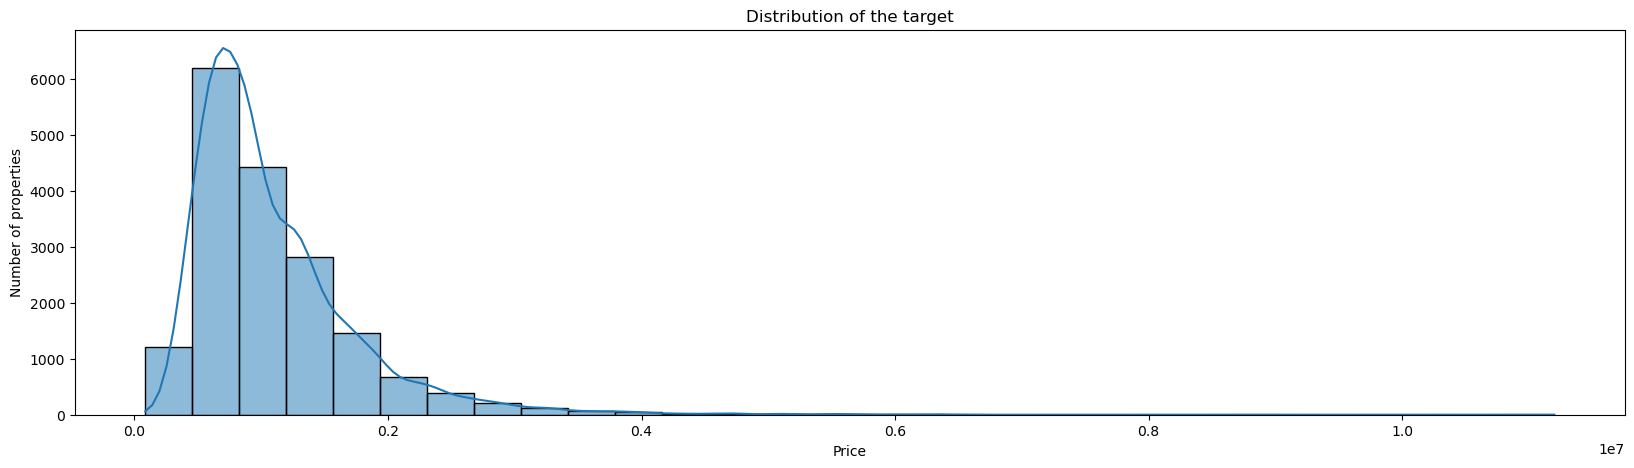

In [63]:
# visualize the distribution of the target
plt.figure( figsize=(20, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of the target')
plt.ylabel('Number of properties')
plt.xlabel('Price')
plt.show()

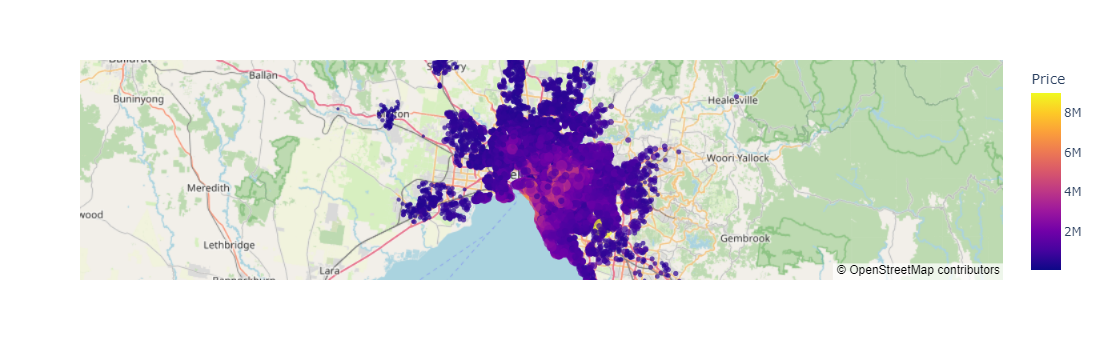

In [95]:
# Create a Mapbox scatter plot that shows the location of the preoperties and represent their price using color
# Plotly Express
fig = px.scatter_mapbox(
    df,
    lat='Lattitude',
    lon='Longtitude',
    color='Price',
    size='Price',
    # color_continuous_scale=px.colors.cyclical.IceFire,
    hover_data = ['Price'],    
    size_max=15,
    zoom=8
    )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

### Model Building

In [32]:
# X[np.isinf(X)] = np.nan  # Replace infinite values with NaN
df[np.isinf(df)] = np.nan  # Replace infinite values with NaN

In [33]:
# drop nan values from X
df.dropna(inplace=True)

In [34]:
# seperate the target from the features
target = 'Price'
y = df[target]
X = df.drop(columns=target)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13965 entries, 1 to 34856
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rooms                           13965 non-null  int64  
 1   Distance                        13965 non-null  float64
 2   Bedroom2                        13965 non-null  float64
 3   Bathroom                        13965 non-null  float64
 4   Car                             13965 non-null  float64
 5   Landsize                        13965 non-null  float64
 6   Lattitude                       13965 non-null  float64
 7   Longtitude                      13965 non-null  float64
 8   Propertycount                   13965 non-null  float64
 9   PpR                             13965 non-null  float64
 10  PpSM                            13965 non-null  float64
 11  TotalBathrooms                  13965 non-null  float64
 12  CpR                             

In [48]:
# import libraries for model building
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# from skopt import BayesSearchCV
from keras.models import Sequential
from keras.layers import Dense

#### Model 1: Gradient Boosting Regression

In [38]:
# create the pipeline
house_price_pipeline  = make_pipeline(
    # SimpleImputer(strategy='mean'),
    StandardScaler(),           # Scale the numeric data
    SelectKBest(f_regression),  # Select the best features
    GradientBoostingRegressor(random_state=42)
    )

# fit the pipeline
house_price_pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x0000020A8D00D9E0>)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [45]:
# Define a custom scorer for cross-validation
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform cross-validation
cv_scores = -cross_val_score(house_price_pipeline, X, y, cv=5, scoring=mae_scorer)

# Print the mean and standard deviation of the cross-validation scores
print(f'Mean Cross-Validation MAE: {cv_scores.mean()}')
print(f'Standard Deviation of Cross-Validation MAE: {cv_scores.std()}')

Mean Cross-Validation MAE: 15331.432141822064
Standard Deviation of Cross-Validation MAE: 987.229012144711


#### Multiple Modelling: RF, GB and LR

In [46]:
# Create a pipeline
house_price_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),      # Impute missing values
    StandardScaler(),                    # Scale numerical features
    SelectKBest(f_regression, k=10)      # Feature selection
)

In [49]:
# Define a custom scorer for cross-validation
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Specify regression algorithms and their hyperparameter grids for tuning
regressors = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'gradientboostingregressor__n_estimators': [50, 100, 200],
            'gradientboostingregressor__learning_rate': [0.01, 0.1, 0.2],
            'gradientboostingregressor__max_depth': [3, 4, 5]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'randomforestregressor__n_estimators': [50, 100, 200],
            'randomforestregressor__max_depth': [None, 10, 20],
            'randomforestregressor__min_samples_split': [2, 5, 10]
        }
    }
}

# Perform grid search for each regressor
best_models = {}
for name, config in regressors.items():
    model = config['model']
    params = config['params']
    
    full_pipeline = make_pipeline(house_price_pipeline, model)
    grid_search = GridSearchCV(full_pipeline, params, cv=5, scoring=mae_scorer, verbose=1)
    
    grid_search.fit(X, y)
    
    best_models[name] = {
        'model': grid_search.best_estimator_,
        'params': grid_search.best_params_,
        'mean_mae': -grid_search.best_score_
    }

# Identify the best model
best_model_name = min(best_models, key=lambda k: best_models[k]['mean_mae'])
best_model = best_models[best_model_name]

# Print the results for each model
for name, info in best_models.items():
    print(f"{name}: Mean MAE - {info['mean_mae']}, Best Parameters - {info['params']}")

print(f"\nBest Model: {best_model_name}")
print(f"Best Parameters: {best_model['params']}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Linear Regression: Mean MAE - 97756.71256852717, Best Parameters - {}
Gradient Boosting: Mean MAE - 5654.292256768193, Best Parameters - {'gradientboostingregressor__learning_rate': 0.2, 'gradientboostingregressor__max_depth': 5, 'gradientboostingregressor__n_estimators': 200}
Random Forest: Mean MAE - 3158.4328532044397, Best Parameters - {'randomforestregressor__max_depth': 20, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}

Best Model: Random Forest
Best Parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}


#### NN Modelling: MLR

In [ ]:
# Bayesian optimization is generally more efficient 
# than grid search, especially when the search space
#  is large or when the evaluation of the objective
#  function (scoring metric) is expensive

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple neural network model using Keras
nn_model = Sequential()
nn_model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network model
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Make predictions on the test set
nn_predictions = nn_model.predict(X_test_scaled).flatten()

# Evaluate the Neural Network model
nn_mae = mean_absolute_error(y_test, nn_predictions)
print(f"Neural Network - Mean Absolute Error on Test Set: {nn_mae}")

88/88 [==============================] - 0s 1ms/step
Neural Network - Mean Absolute Error on Test Set: 1107248.9166434086
